## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Train.csv.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Test.csv.csv')

In [ ]:
df = train_data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [ ]:
df.shape

(20000, 41)

There are 20000 rows and 41 columns.

In [ ]:
test_data.shape

(5000, 41)

There are 5000 rows and 41 columns in test dataset.

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


About 75% of the target rows have 0 as their value. We can say that the data is skewed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

All the columns are Numerical columns.

In [ ]:
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are 18 rows missing in V1 and V2 columns. We can impute these missing values later.

In [ ]:
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

There are few missing rows in V1 and V2 columns in test data.

In [ ]:
df.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

There are no duplicates in the train and test dataset.

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

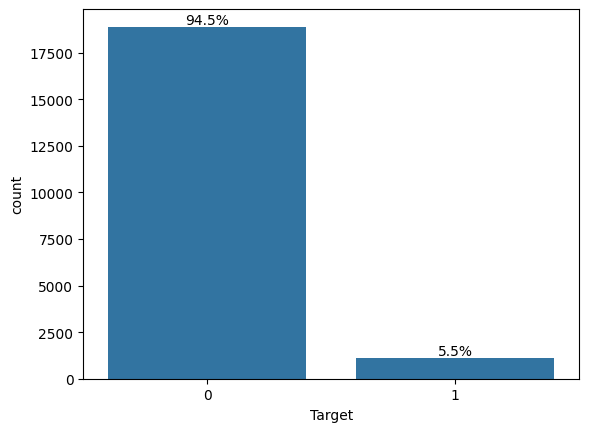

In [ ]:
ax = sns.countplot(data=df, x = 'Target')
total = df['Target'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

Only 5.5% of the machines has failure. There is imbalance in the dataset.

### Plotting all the features at one go

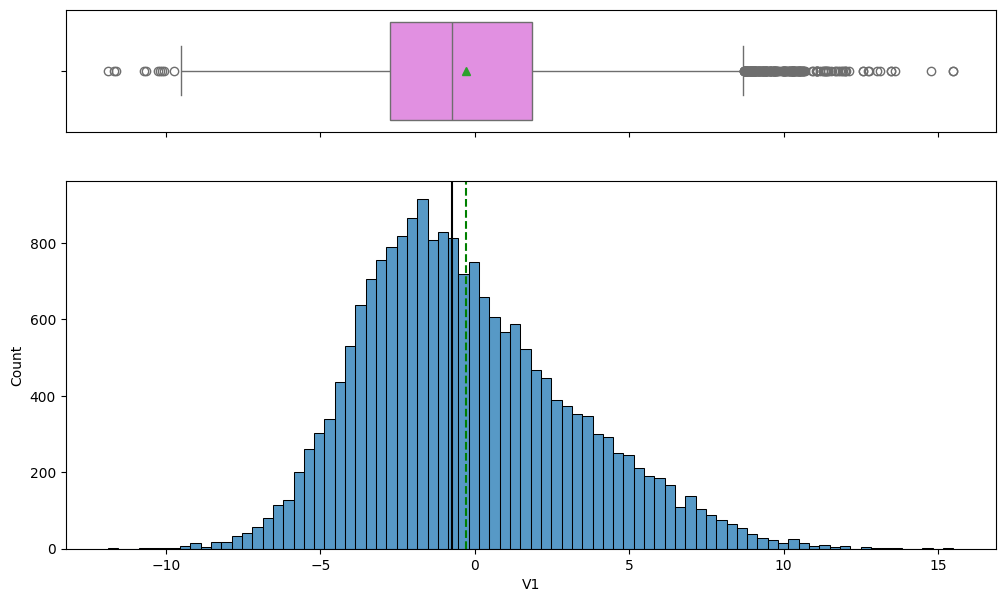

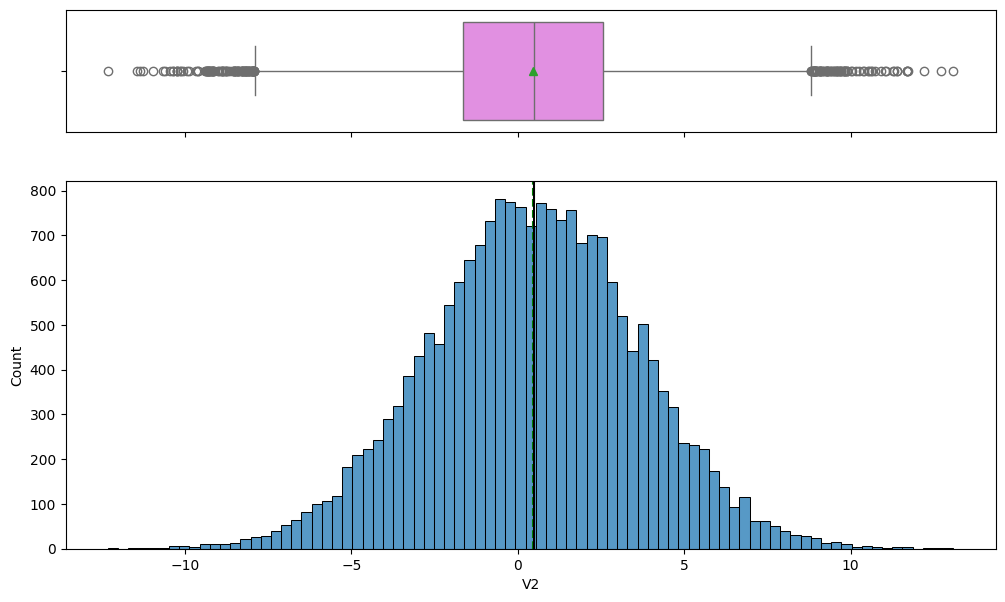

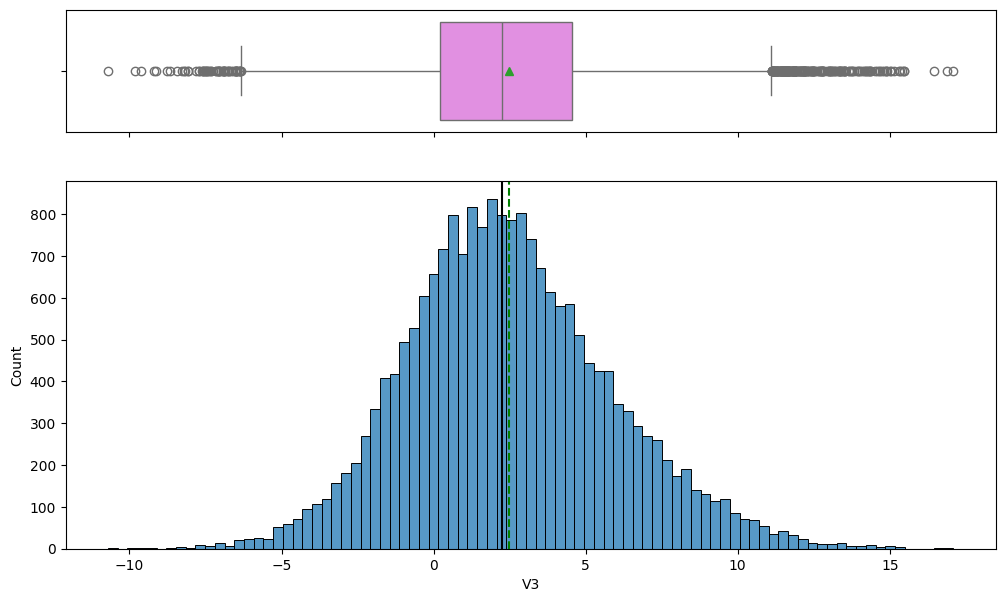

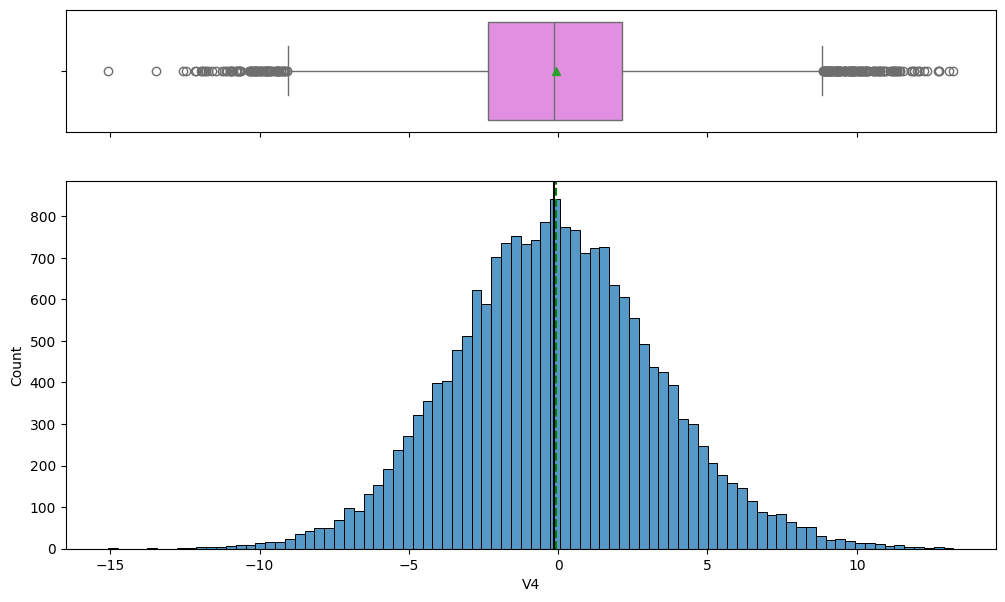

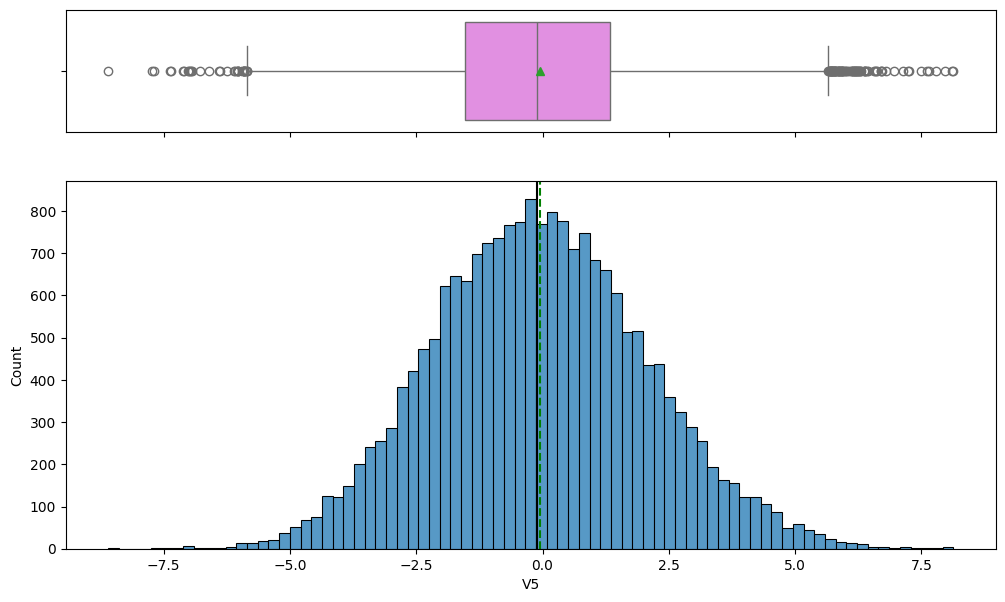

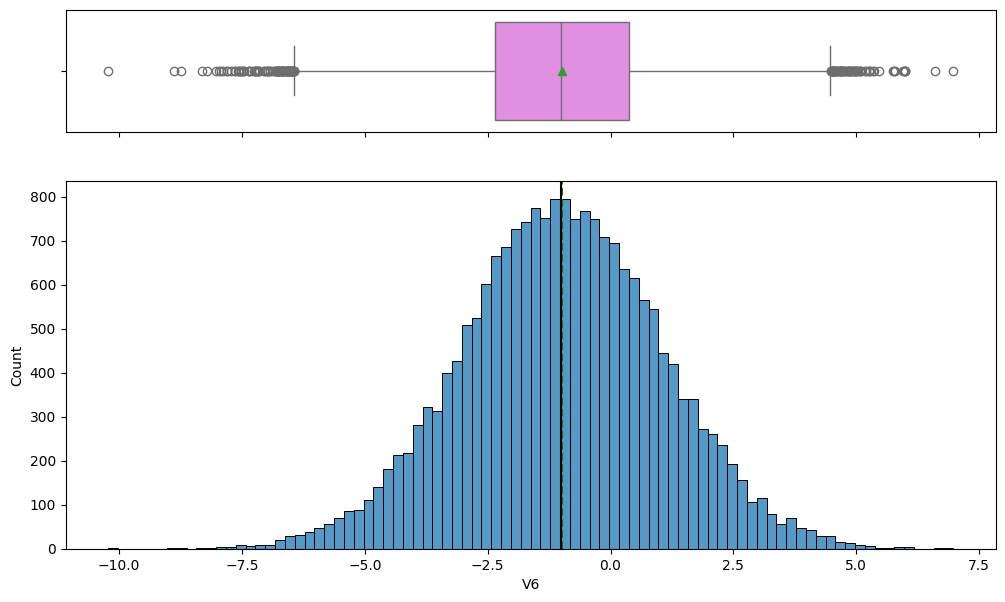

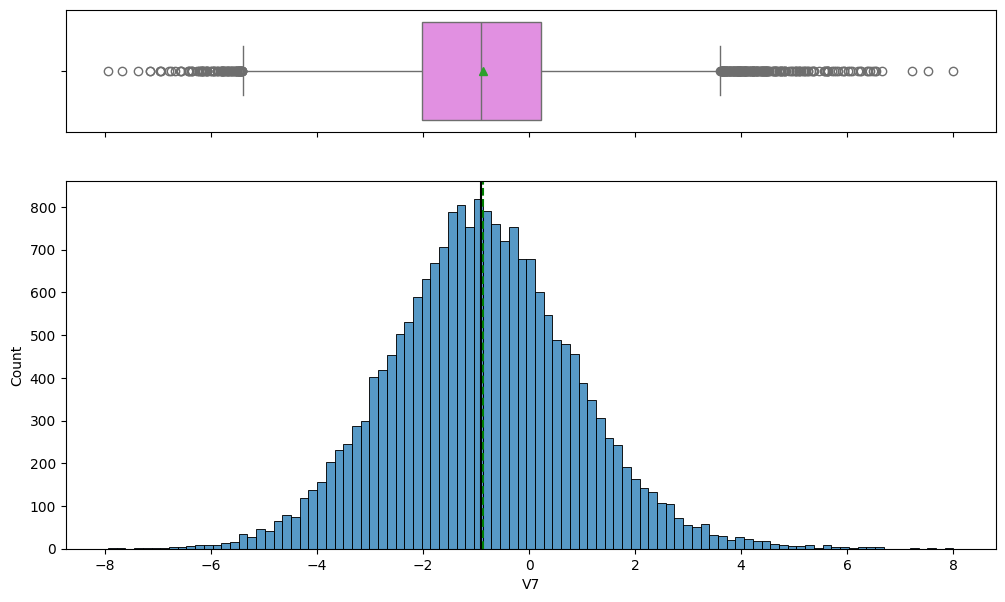

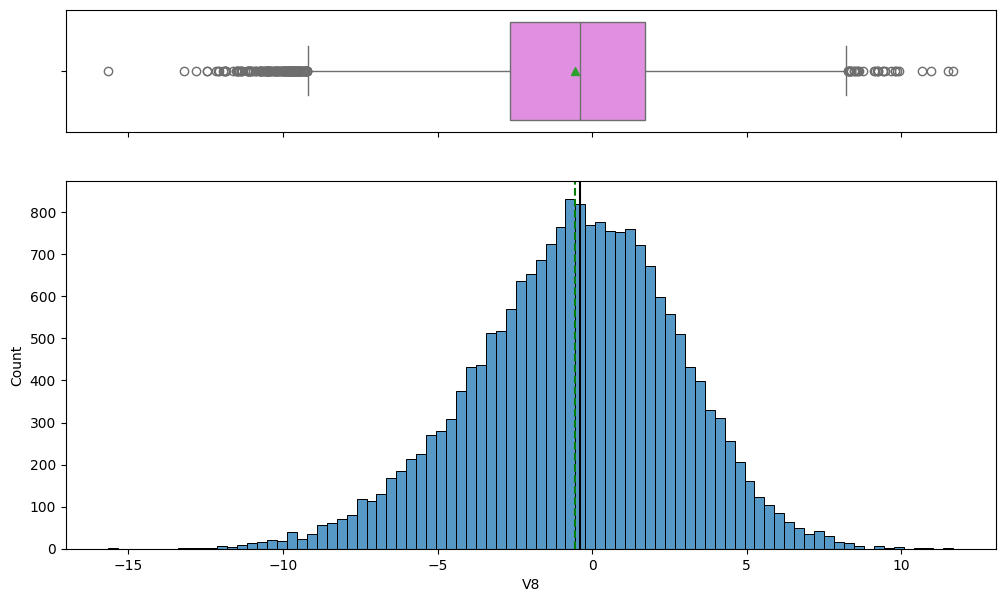

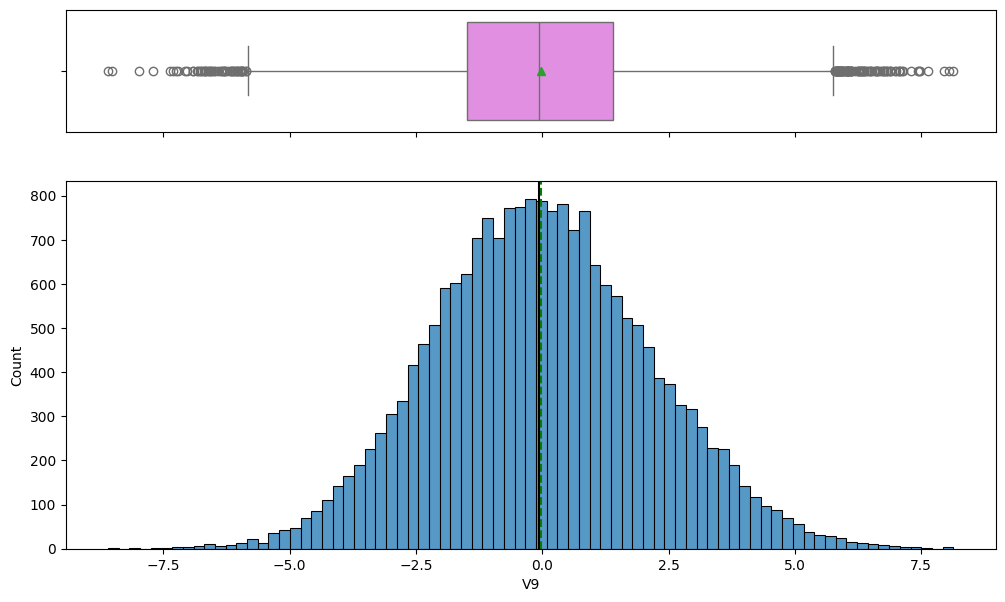

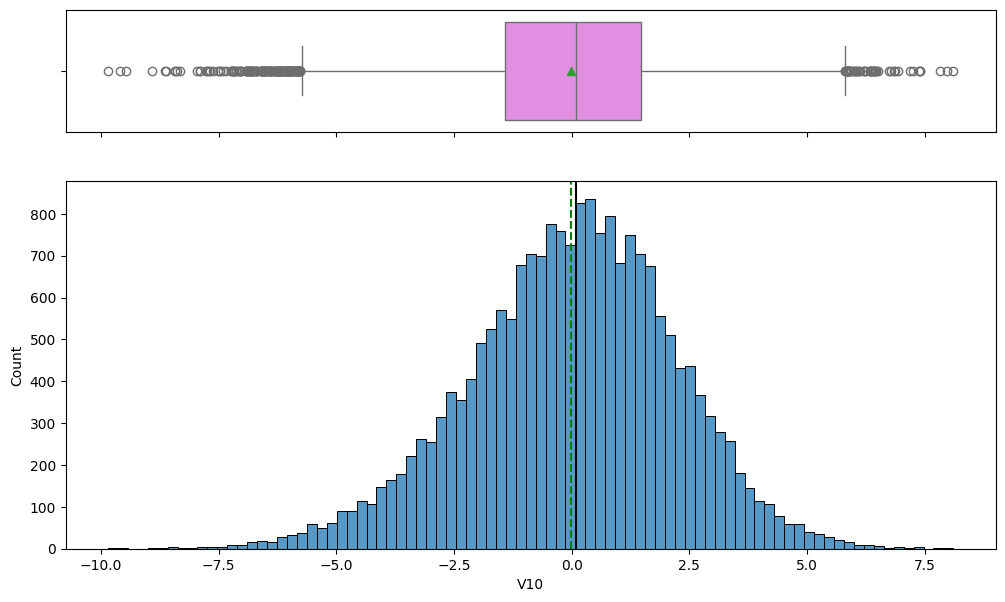

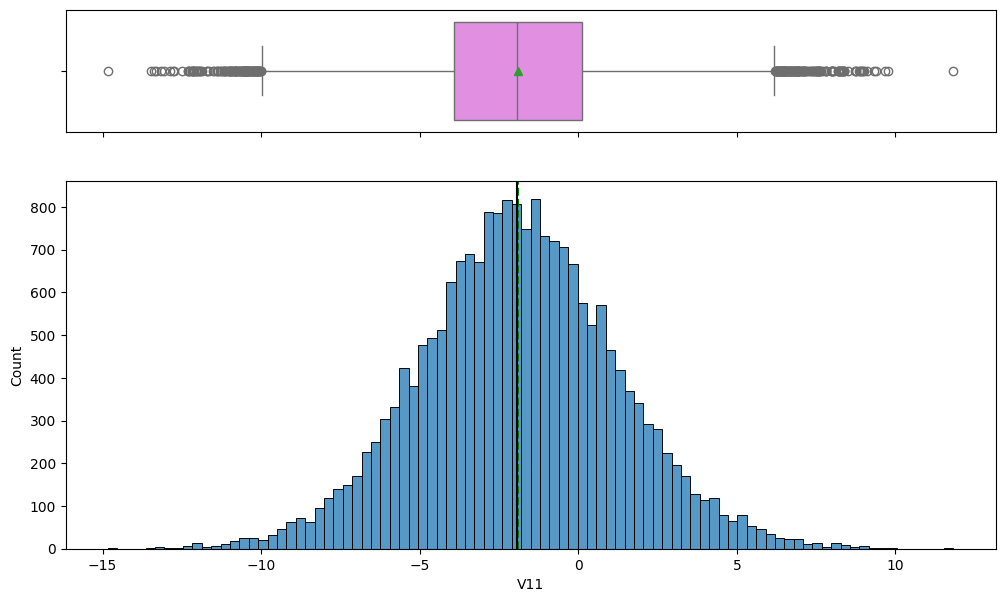

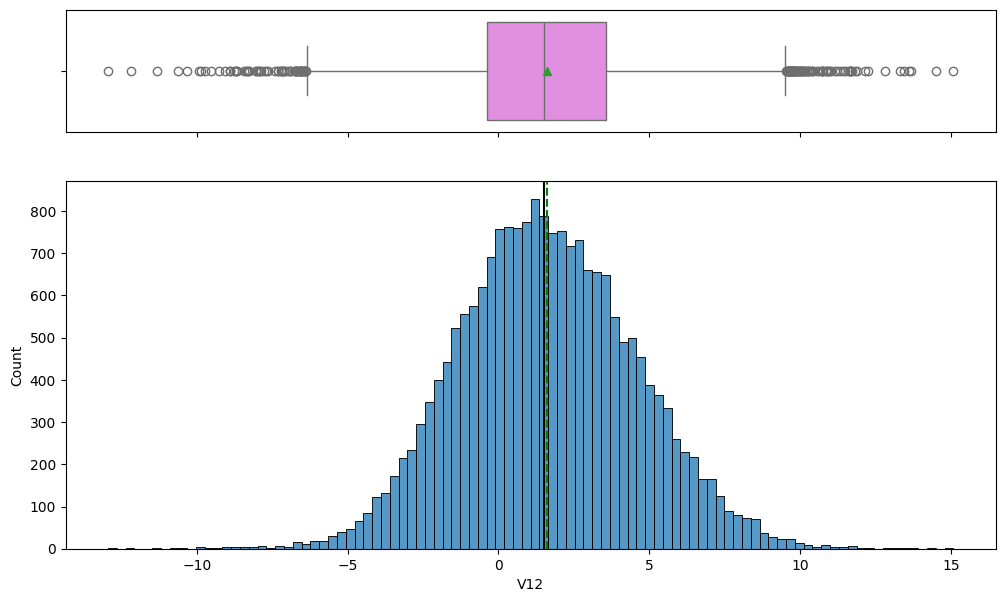

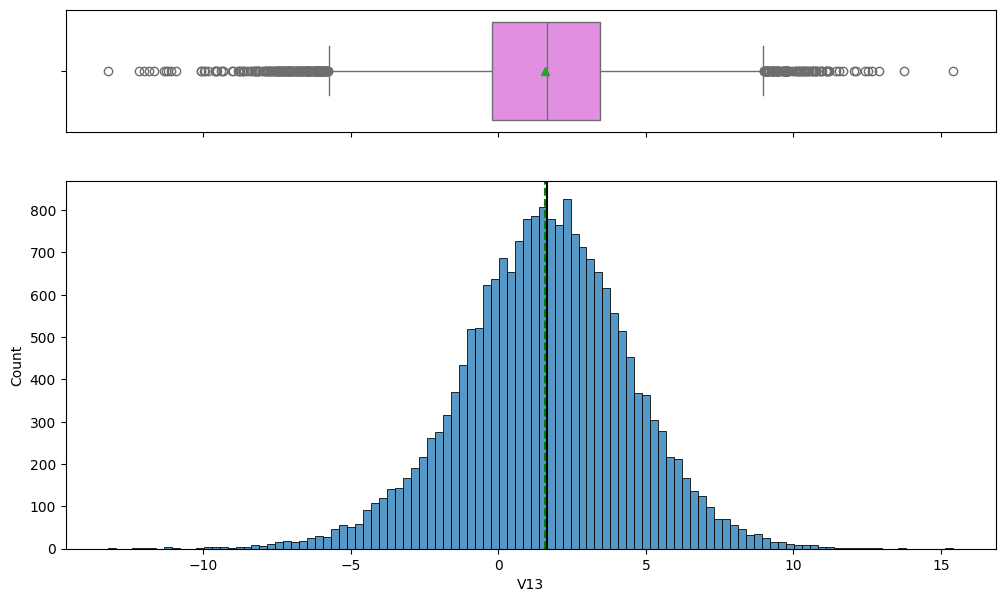

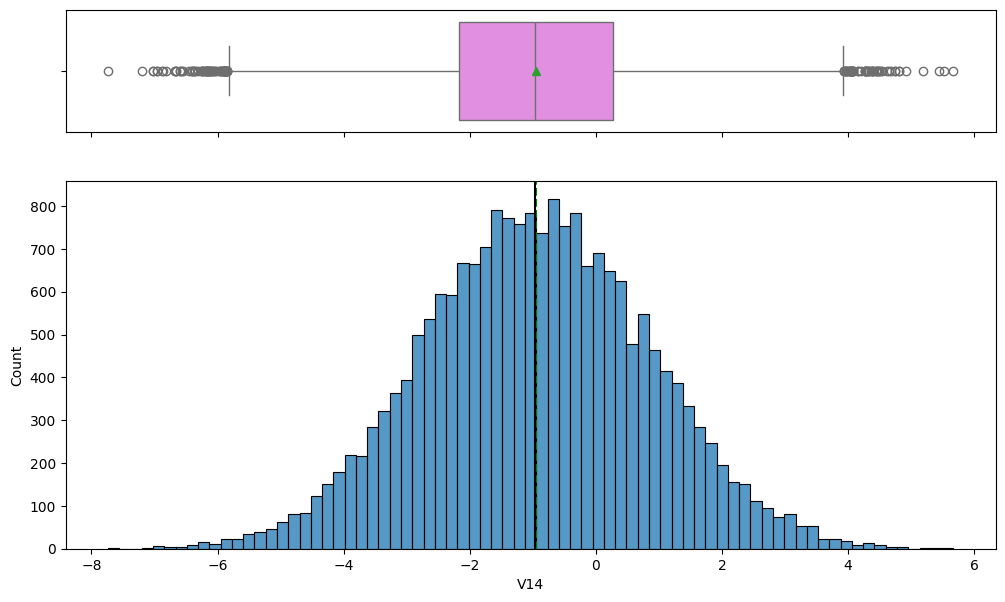

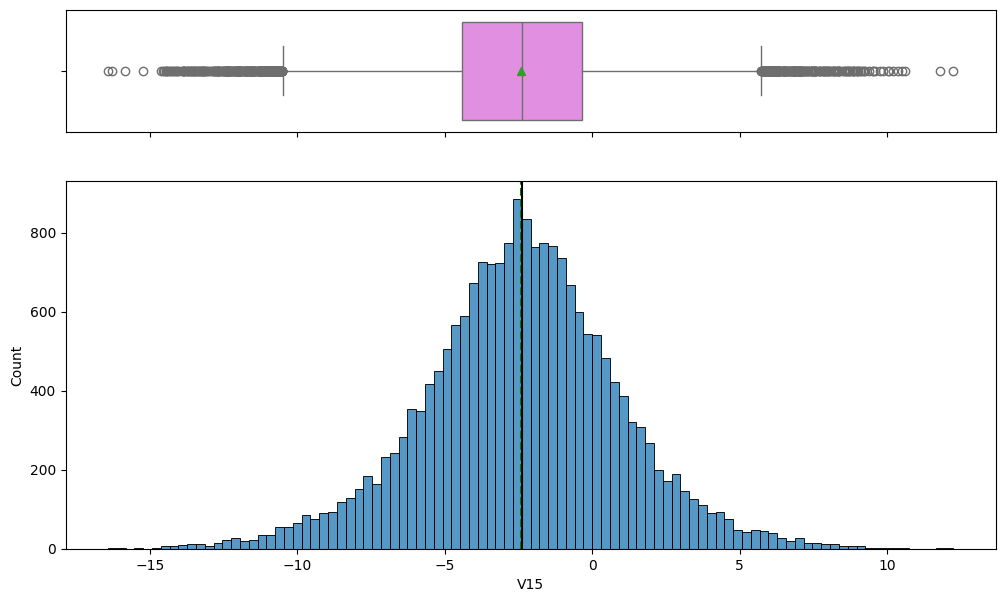

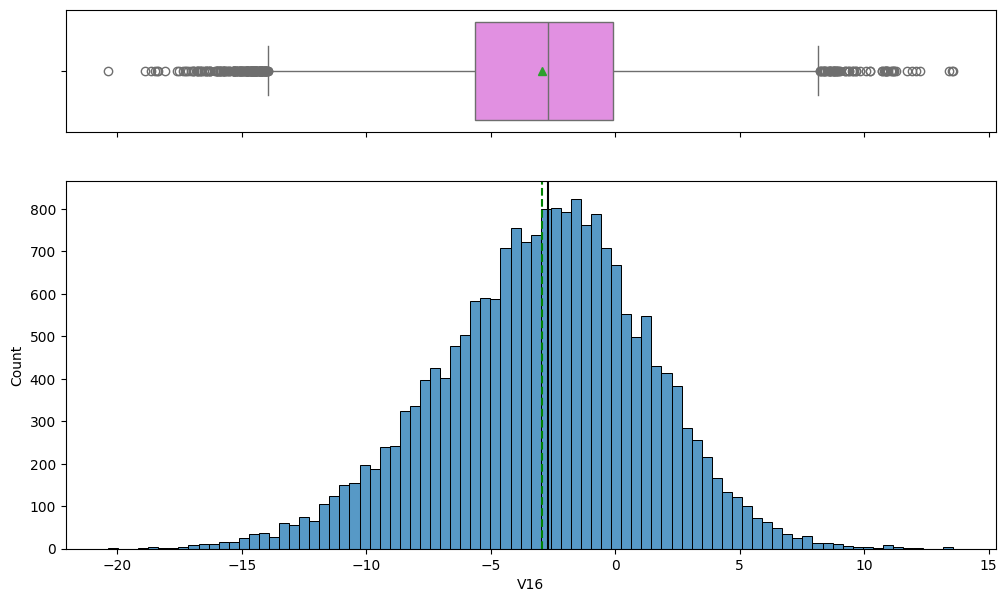

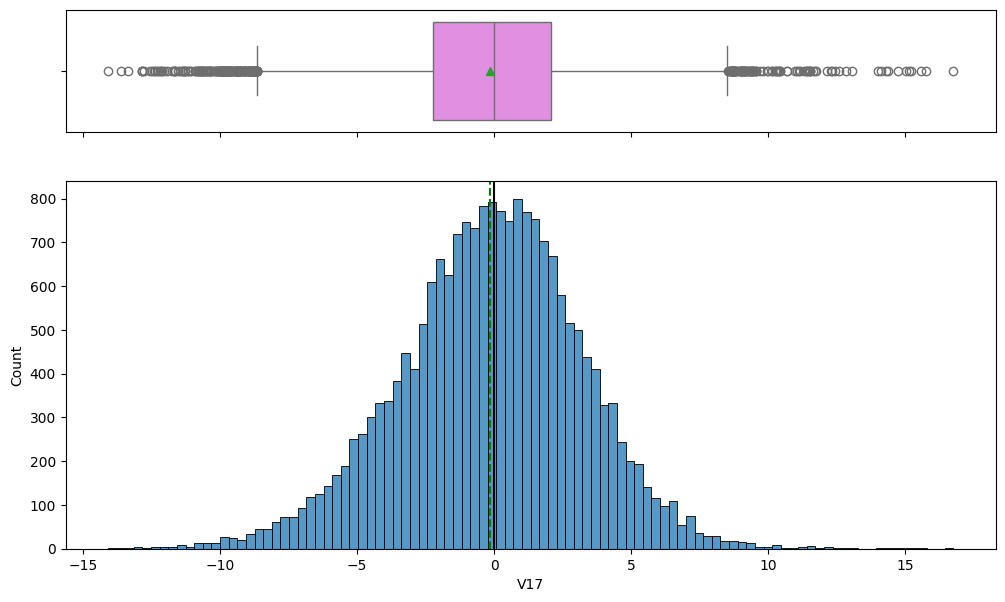

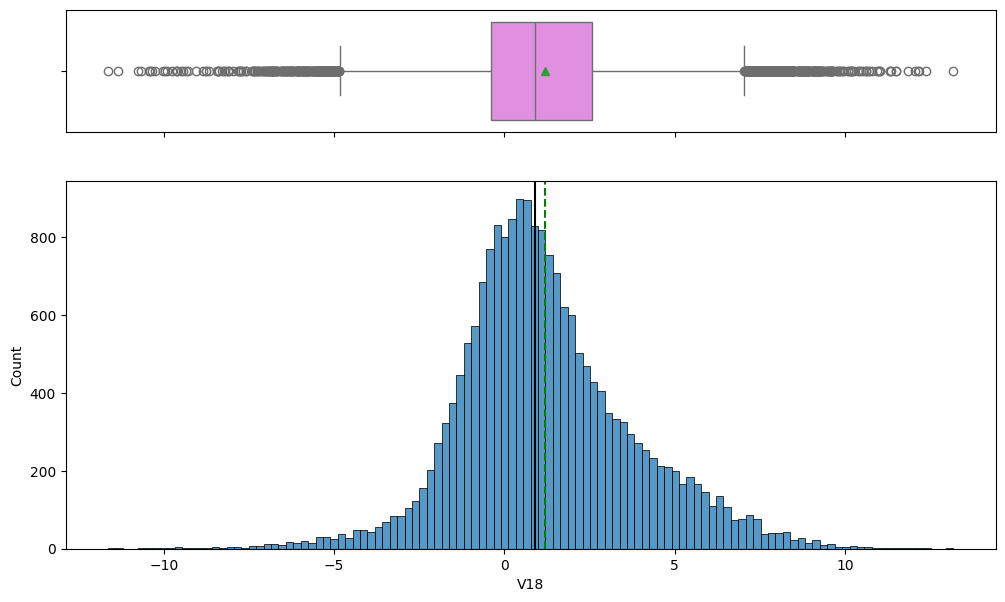

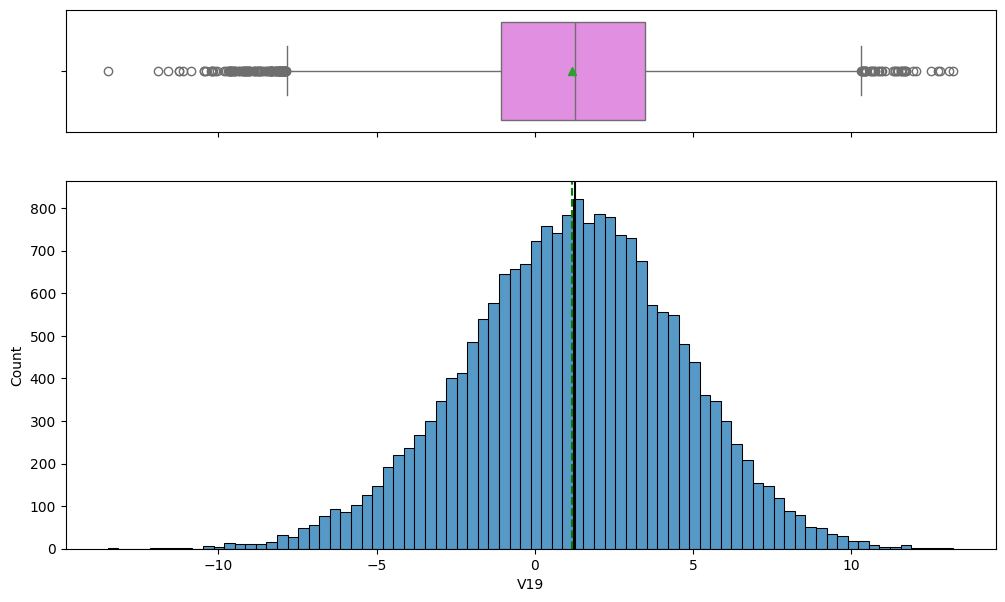

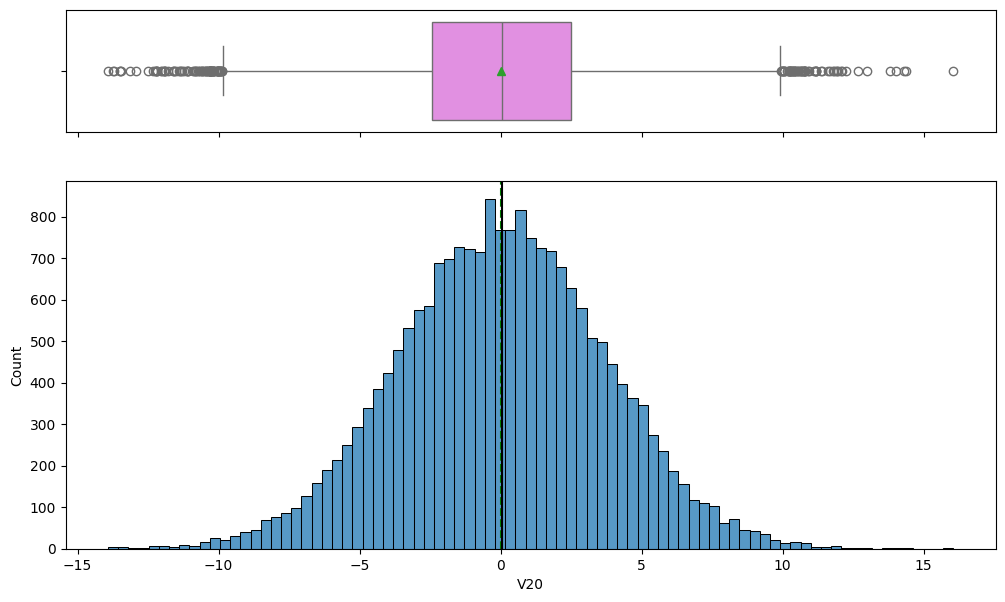

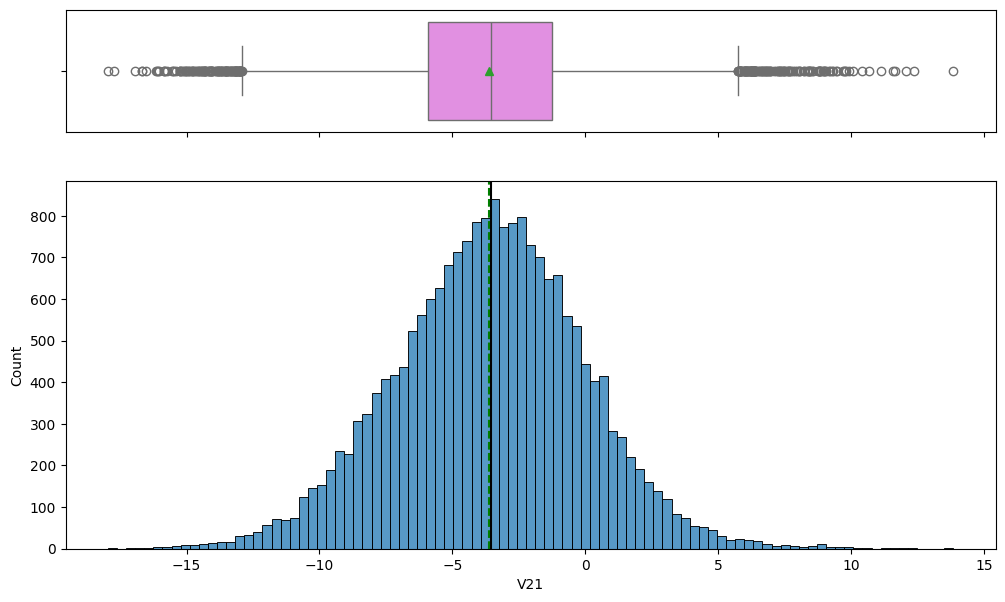

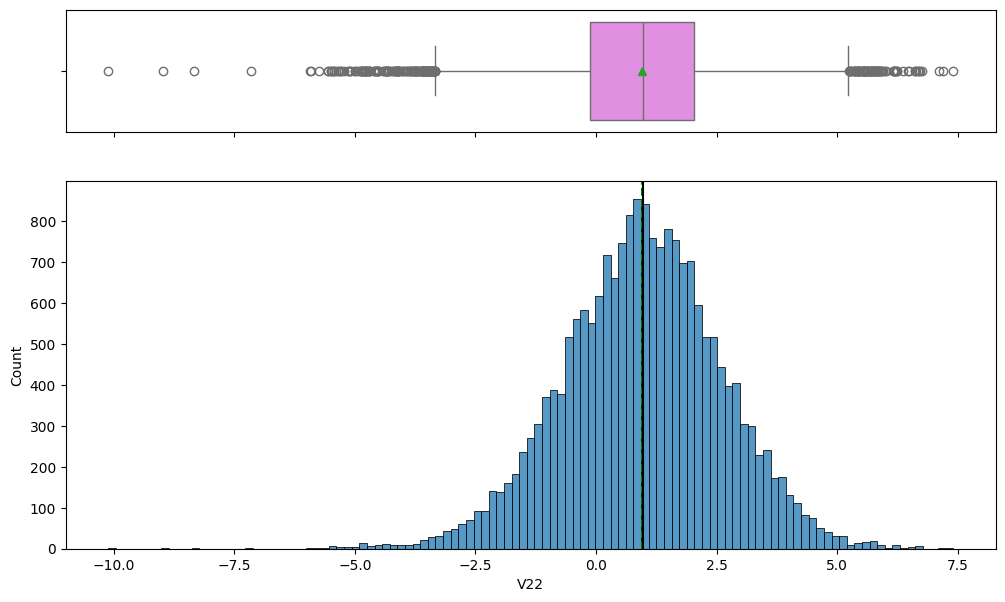

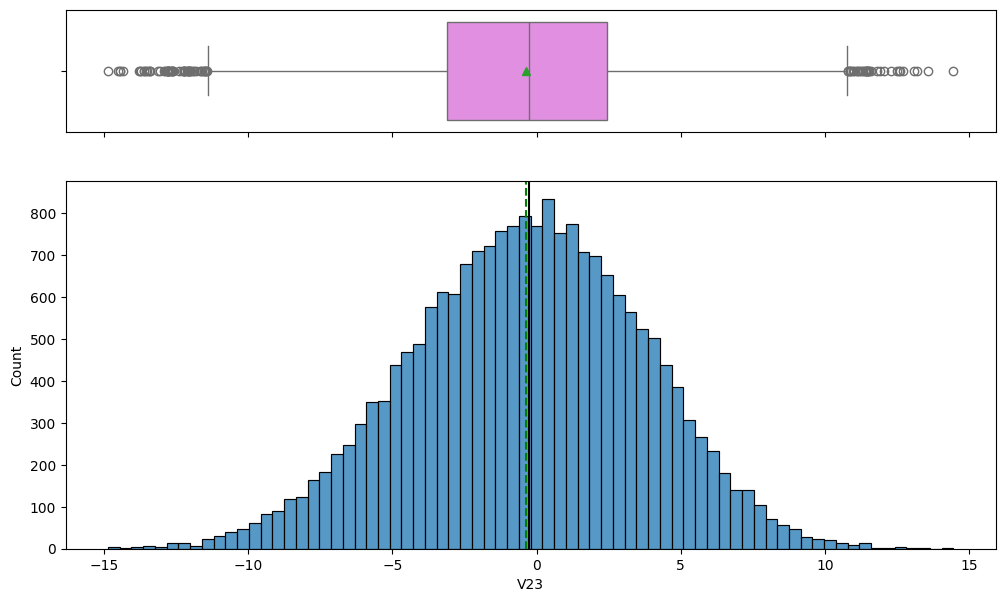

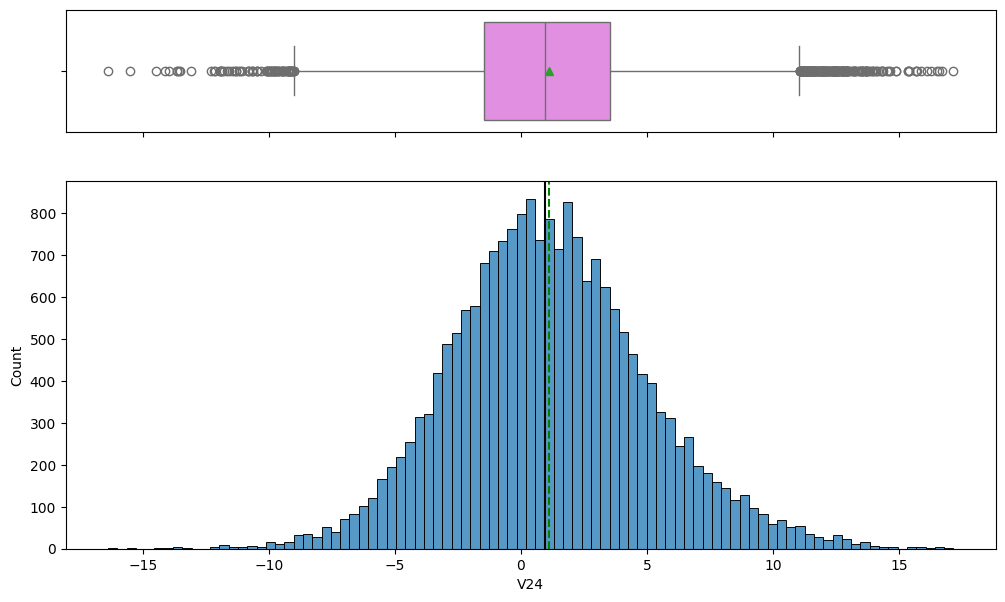

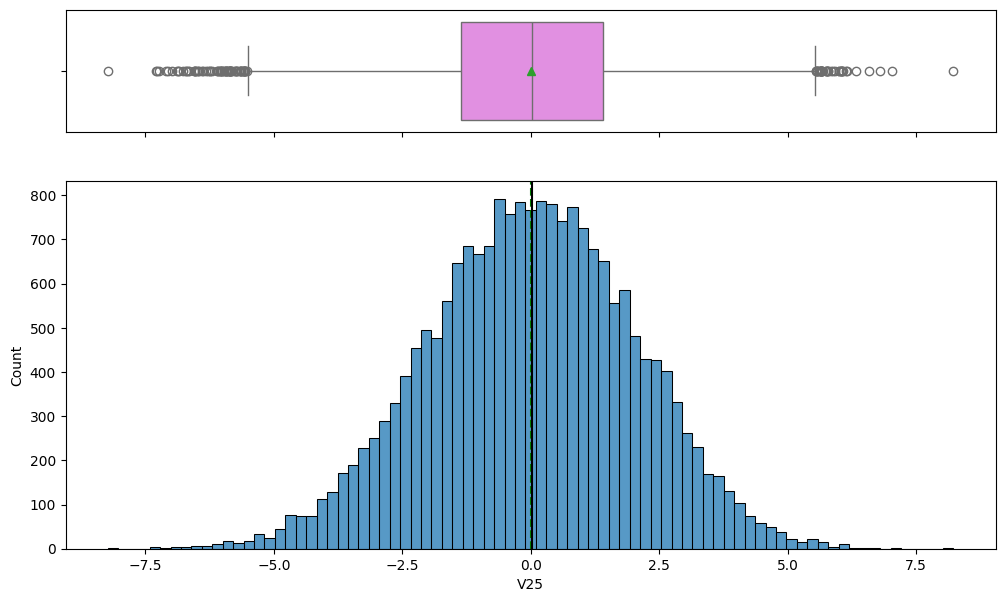

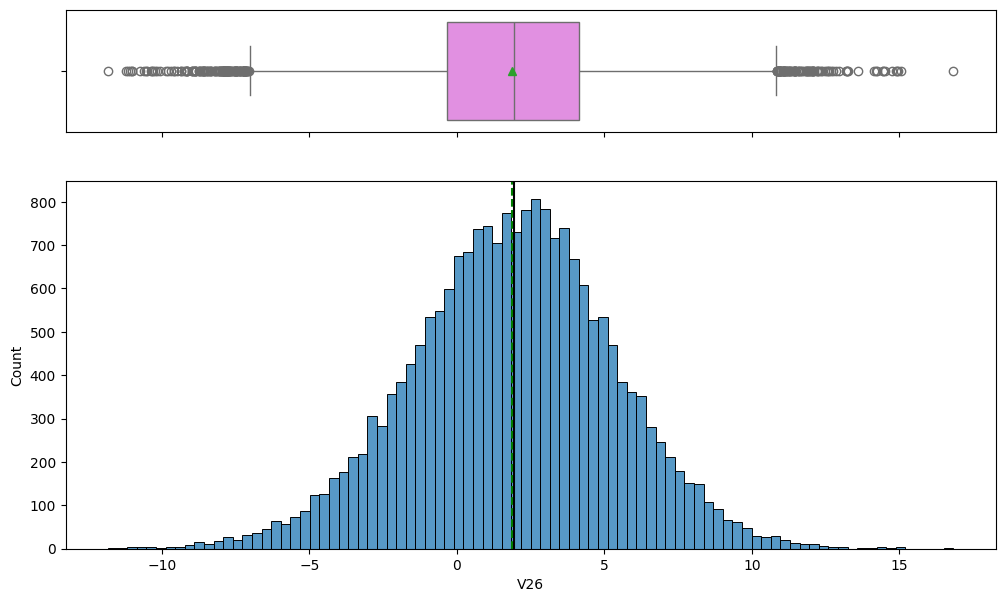

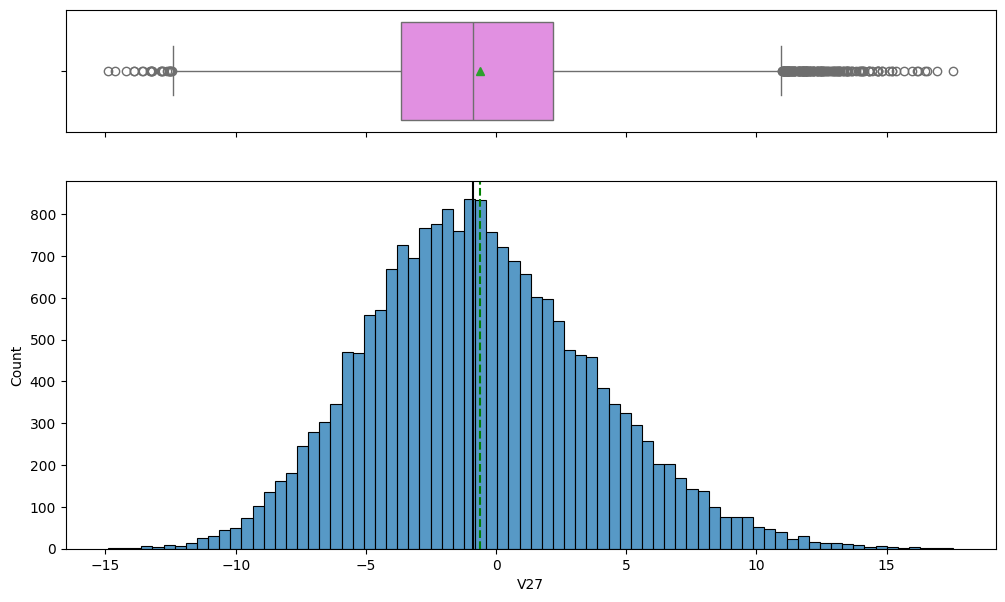

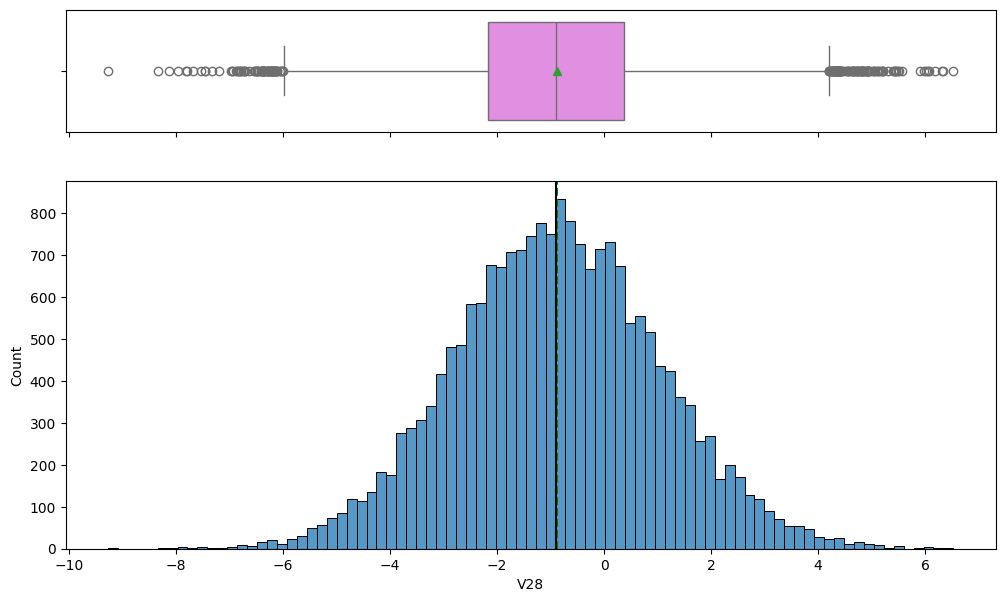

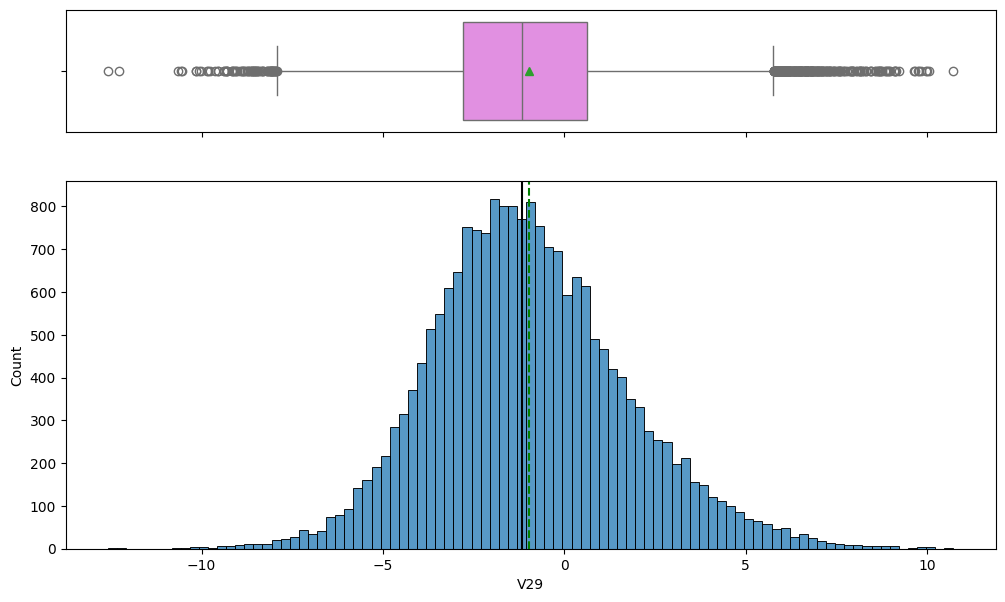

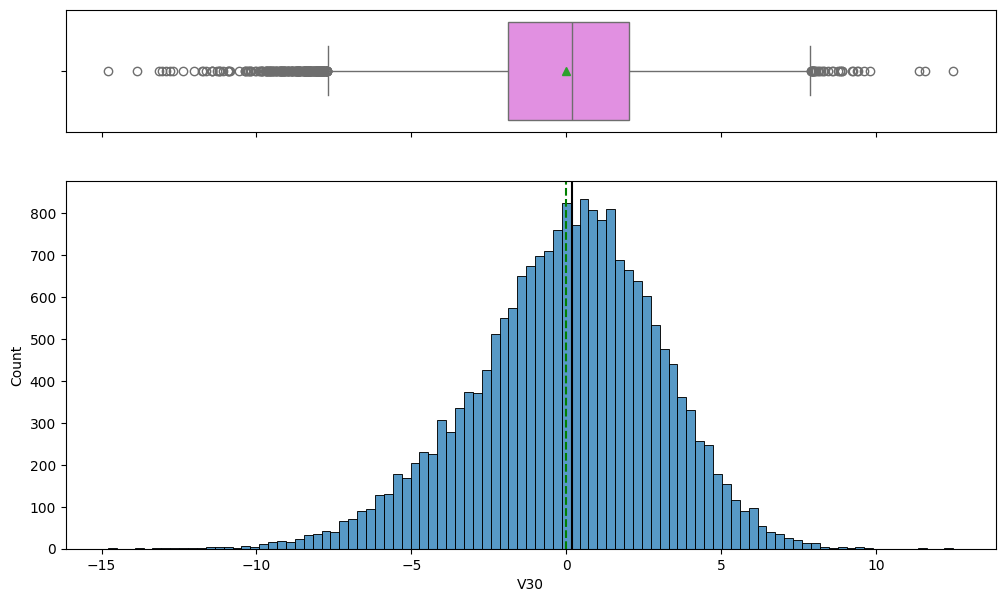

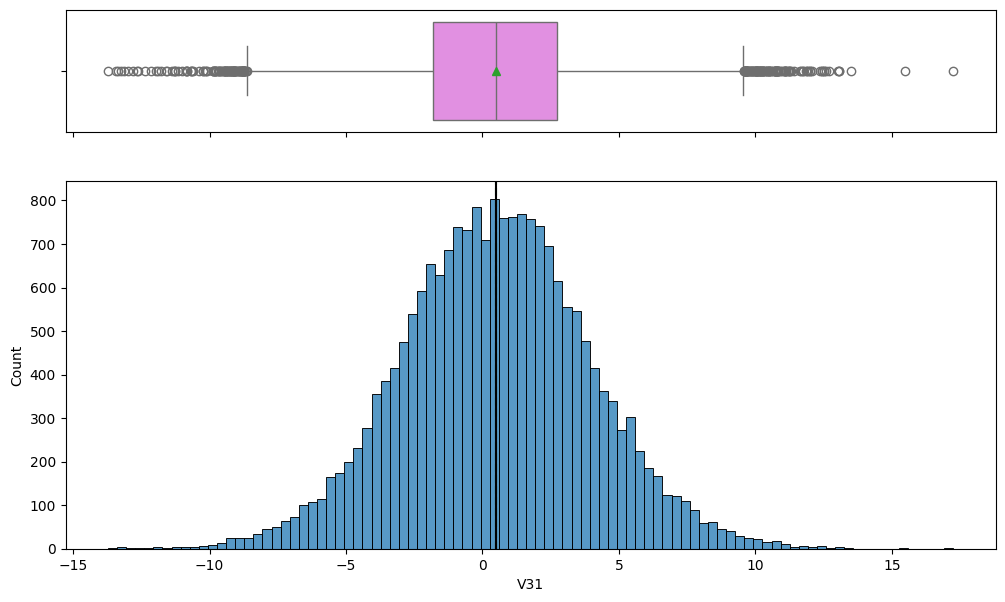

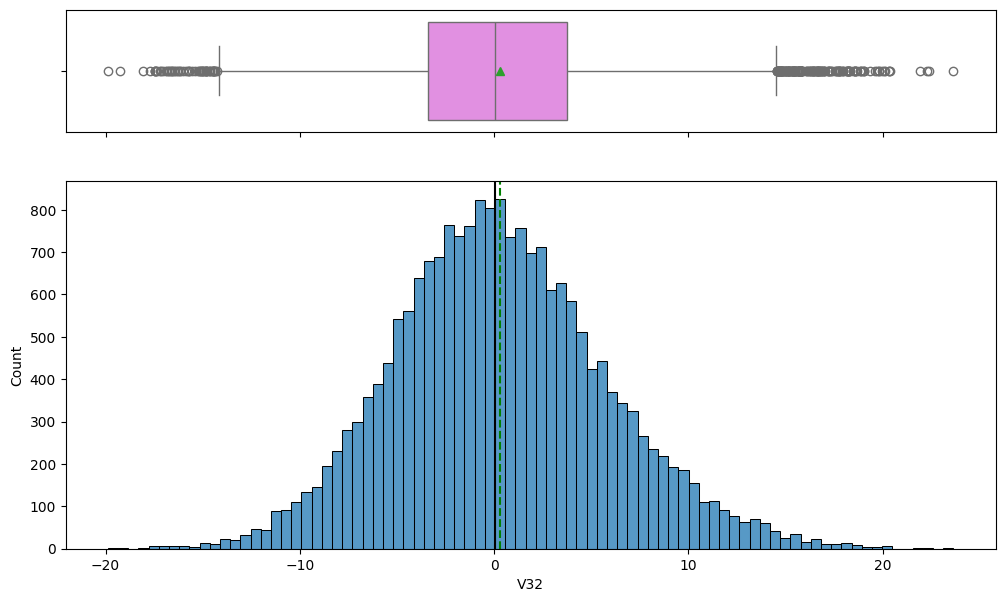

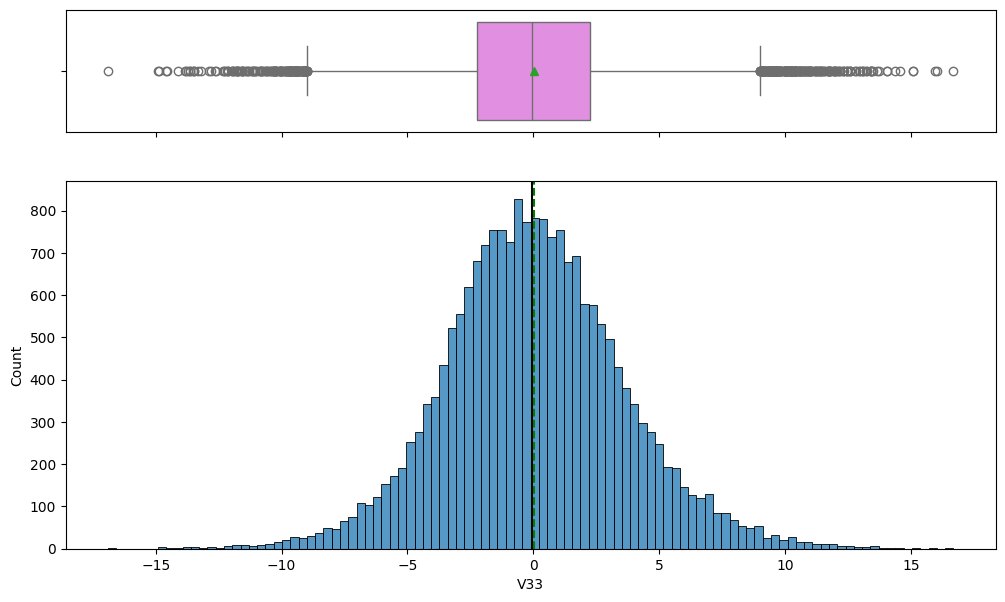

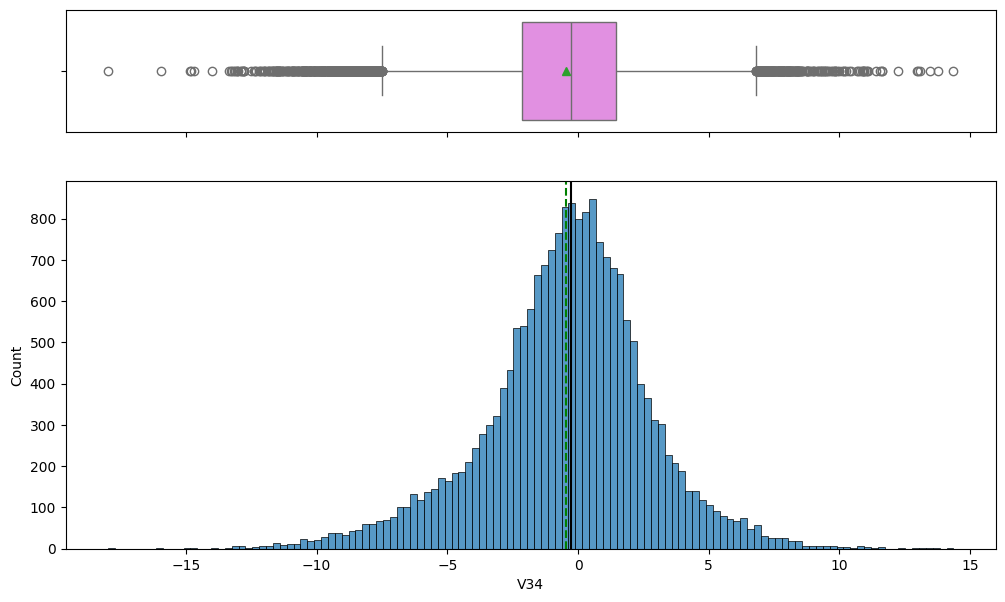

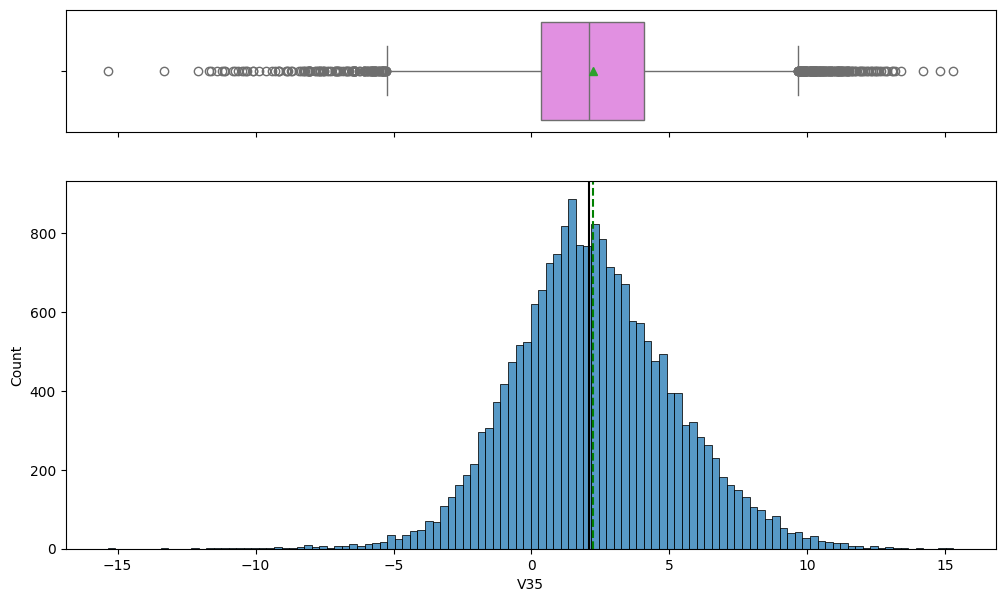

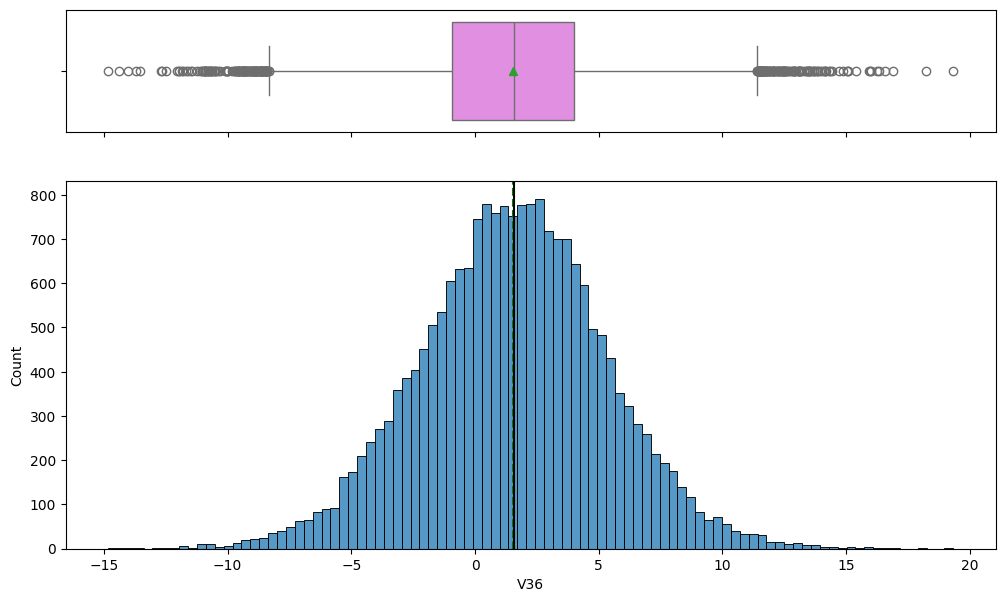

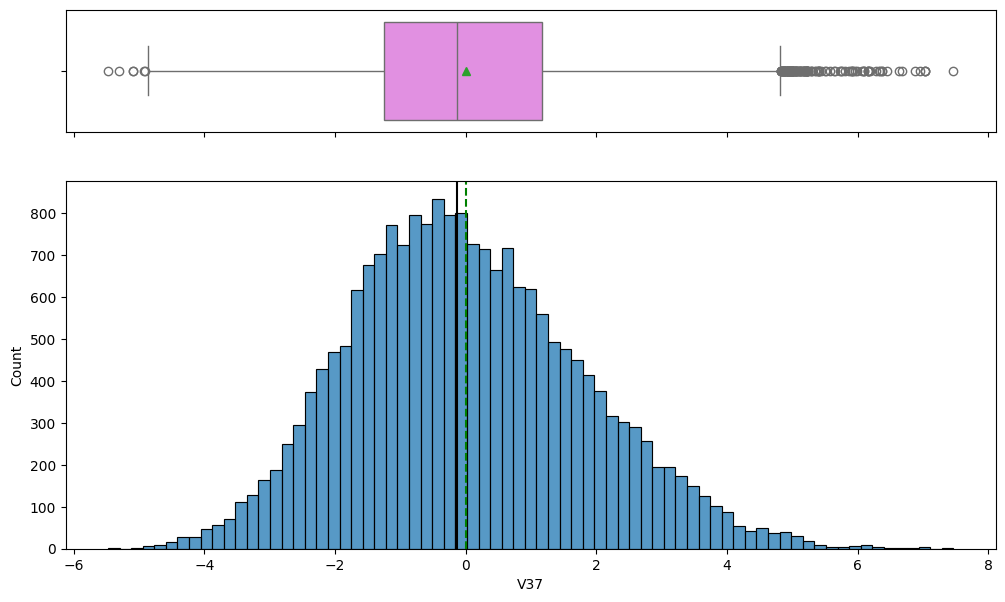

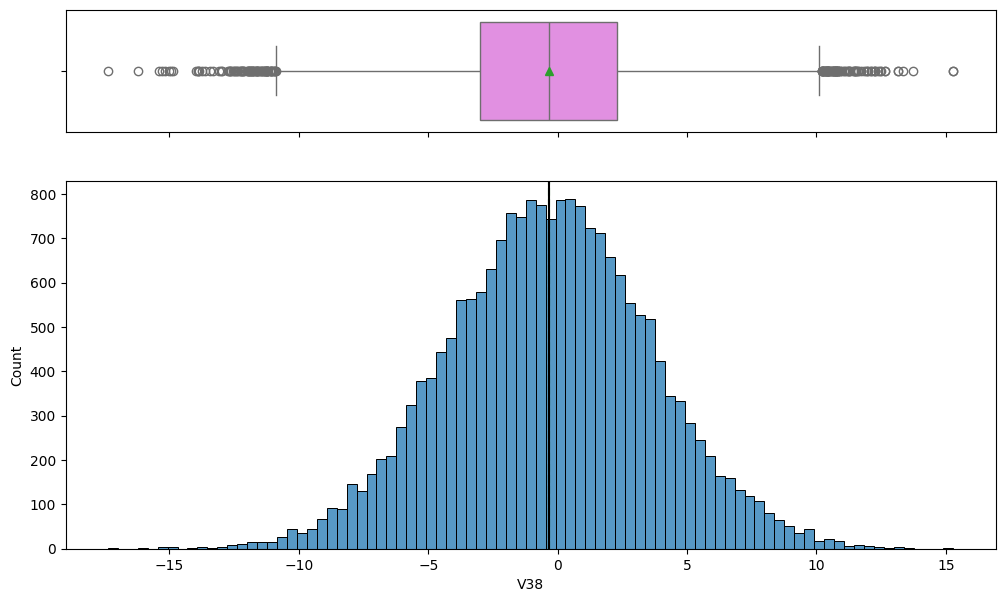

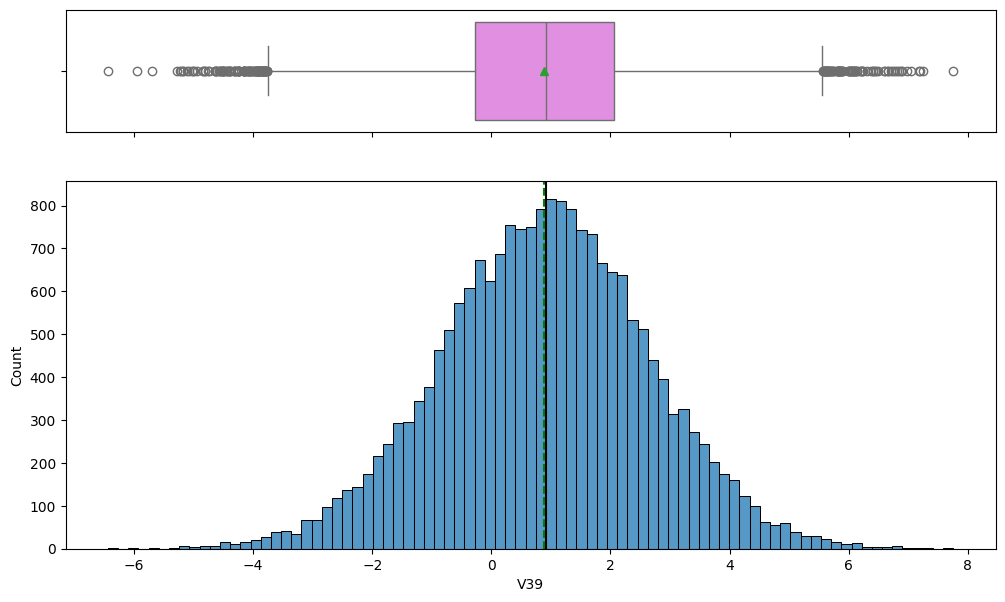

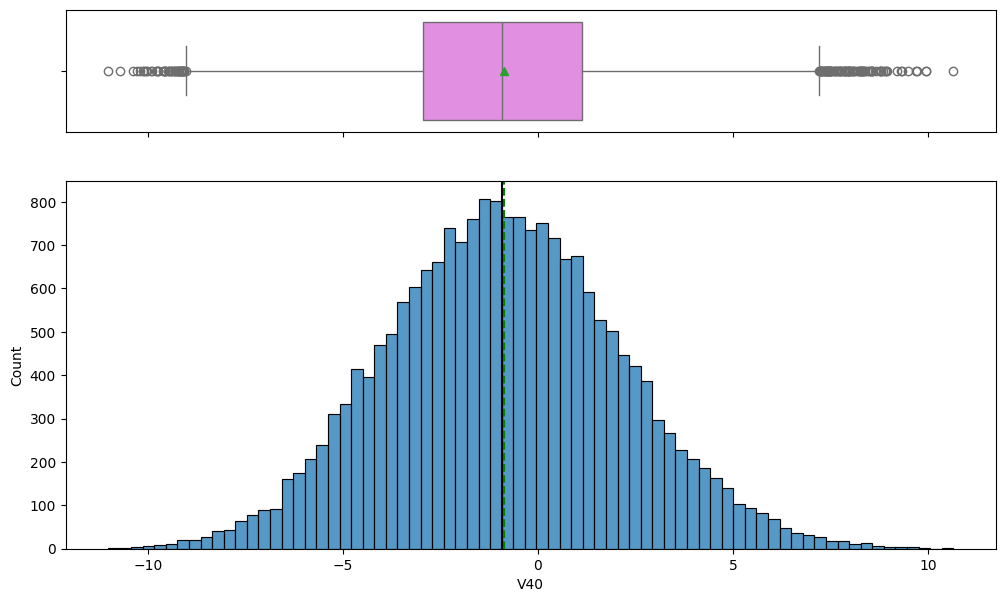

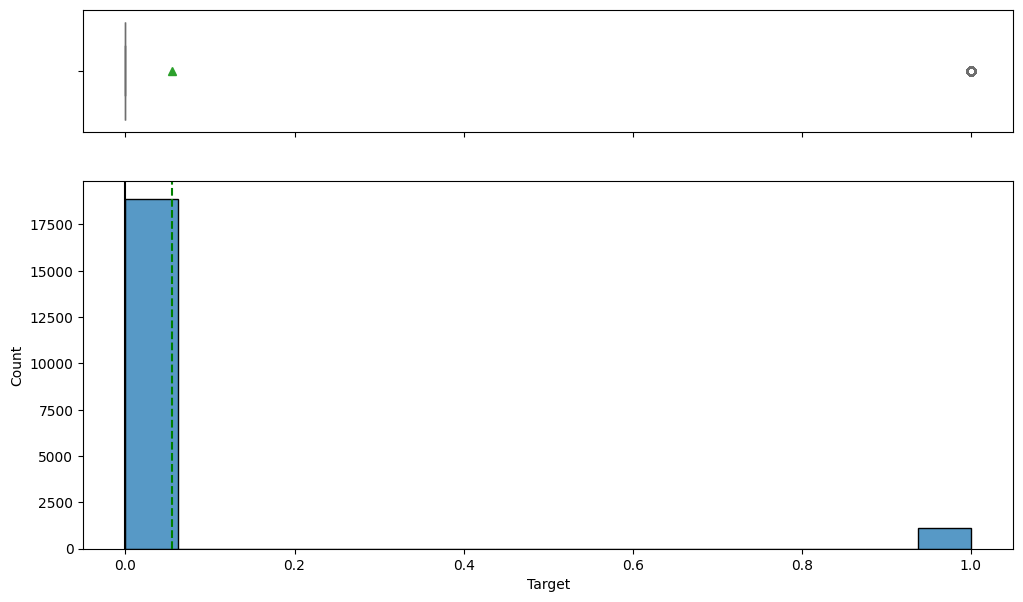

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

All the columns are somewhat normally distributed.

## Data Pre-processing

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [ ]:
print("Number of rows in train data =", X_train.shape)
print("Number of rows in validation data =", X_val.shape)

Number of rows in train data = (14000, 40)
Number of rows in validation data = (6000, 40)


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Percentage of classes in training set:
0    0.9445
1    0.0555
Name: Target, dtype: float64
Percentage of classes in validation set:
0    0.9445
1    0.0555
Name: Target, dtype: float64


In [ ]:
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [ ]:
print("Number of rows in test data =", X_test.shape)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in test data = (5000, 40)
Percentage of classes in test set:
0    0.9436
1    0.0564
Name: Target, dtype: float64


## Missing value imputation




In [ ]:
imputer = SimpleImputer(strategy = 'median')

In [ ]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

All the missing values have been imputed.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XG Boost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7078246484698097
Random Forest: 0.7194127377998345
Logistic Regression: 0.4902481389578163
Bagging: 0.707808105872622
Ada Boost: 0.6434656741108354
Gradient Boost: 0.7220016542597187
XG Boost: 0.8095368072787427

Validation Performance:

dtree: 0.7057057057057057
Random Forest: 0.7357357357357357
Logistic Regression: 0.5015015015015015
Bagging: 0.7267267267267268
Ada Boost: 0.6516516516516516
Gradient Boost: 0.7357357357357357
XG Boost: 0.8288288288288288


*   XG Boost is giving the highest recall score followed by Gradient Boost and Random Forest models.
*   Logistic Regression model is giving the least recall score.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models_over.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XG Boost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Training dataset:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation dataset:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training dataset:

dtree: 0.970128321355339
Random Forest: 0.9829090368319754
Logistic Regression: 0.8917044404851445
Bagging: 0.975119441528989
Ada Boost: 0.904787470436327
Gradient Boost: 0.9329201902370526
XG Boost: 0.9904713314591799

Validation dataset:

dtree: 0.7837837837837838
Random Forest: 0.8558558558558559
Logistic Regression: 0.8498498498498499
Bagging: 0.8258258258258259
Ada Boost: 0.8618618618618619
Gradient Boost: 0.8768768768768769
XG Boost: 0.8558558558558559


*   All the models are performing decently. The models are not badly performing in the validation set.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_un.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Ada Boost", AdaBoostClassifier(random_state=1)))
models_un.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XG Boost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Training dataset:" "\n")

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation dataset:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training dataset:

dtree: 0.8622167080231596
Random Forest: 0.9034822167080232
Logistic Regression: 0.8726220016542598
Bagging: 0.880339123242349
Ada Boost: 0.8725971877584782
Gradient Boost: 0.8932009925558313
XG Boost: 0.8983457402812242

Validation dataset:

dtree: 0.8408408408408409
Random Forest: 0.8828828828828829
Logistic Regression: 0.8468468468468469
Bagging: 0.8708708708708709
Ada Boost: 0.8588588588588588
Gradient Boost: 0.8828828828828829
XG Boost: 0.8828828828828829


*   Random Forest model is performing well followed by Gradient Boost and XG Boost models.
*   Decision Tree is giving least recall score compared to other models.

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method with original data

####Random Forest

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "class_weight" : ['balanced'],
              "min_samples_leaf": np.arange(50, 101, 10),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 100, 'max_samples': 0.5, 'max_features': 'sqrt', 'class_weight': 'balanced'} with CV score=0.8662200165425971:


In [ ]:
rf_tuned = RandomForestClassifier(
    n_estimators= 250,
    min_samples_leaf= 100,
    max_samples= 0.5,
    max_features= 'sqrt',
    class_weight= 'balanced')

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=0.5,
                       min_samples_leaf=100, n_estimators=250)

In [ ]:
rf_tuned_random_train=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_random_train)
rf_tuned_random_val=model_performance_classification_sklearn(rf_tuned,X_val,y_val)
print("Validation performance:\n",rf_tuned_random_val)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.932571  0.900901   0.446713  0.59727
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.918833  0.843844   0.392458  0.535748


### Sample tuning method with oversampled data

####Random Forest

In [ ]:
Model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "class_weight" : ['balanced'],
              "min_samples_leaf": np.arange(50, 101, 10),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 50, 'max_samples': 0.6, 'max_features': 'sqrt', 'class_weight': 'balanced'} with CV score=0.9274748976889573:


In [ ]:
rf_tuned_over = RandomForestClassifier(
    n_estimators= 200,
    min_samples_leaf= 50,
    max_samples= 0.6,
    max_features= 'sqrt',
    class_weight= 'balanced'
)

rf_tuned_over.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced', max_samples=0.6,
                       min_samples_leaf=50, n_estimators=200)

In [ ]:
rf_tuned_random_train_over=model_performance_classification_sklearn(rf_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",rf_tuned_random_train_over)
rf_tuned_random_val_over=model_performance_classification_sklearn(rf_tuned_over,X_val,y_val)
print("Validation performance:\n",rf_tuned_random_val_over)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.957574  0.933298   0.980924  0.956518
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.969833  0.864865   0.679245  0.760898


####Ada Boost

In [ ]:
Model = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.1, 0.2, 0.05],
               "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9764048857633935:


In [ ]:
adaboost_tuned_over = AdaBoostClassifier(random_state=1,
                                         n_estimators = 200,
                                         learning_rate = 0.2,
                                         base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1))

adaboost_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [ ]:
ada_tuned_random_train_over=model_performance_classification_sklearn(adaboost_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",ada_tuned_random_train_over)
ada_tuned_random_val_over=model_performance_classification_sklearn(adaboost_tuned_over,X_val,y_val)
print("Validation performance:\n",ada_tuned_random_val_over)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.993912  0.991001   0.996805  0.993894
Validation performance:
    Accuracy    Recall  Precision       F1
0  0.979833  0.843844   0.802857  0.82284


####Gradient Boost

In [ ]:
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(200,301,50),
              "learning_rate": [0.01, 0.1, 0.2],
              "subsample":[0.7,0.8],
              "max_features":[0.6,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 300, 'max_features': 0.6, 'learning_rate': 0.2} with CV score=0.9752700124975334:


In [ ]:
gb_tuned_over = GradientBoostingClassifier(subsample = 0.7,
                                          n_estimators = 300,
                                          max_features = 0.6,
                                          learning_rate = 0.2)


gb_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.6,
                           n_estimators=300, subsample=0.7)

In [ ]:
gb_tuned_random_train_over=model_performance_classification_sklearn(gb_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",gb_tuned_random_train_over)
gb_tuned_random_val_over=model_performance_classification_sklearn(gb_tuned_over,X_val,y_val)
print("Validation performance:\n",gb_tuned_random_val_over)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994366  0.992589   0.996129  0.994356
Validation performance:
    Accuracy    Recall  Precision        F1
0    0.9805  0.867868   0.798343  0.831655


### Sample tuning method with undersampled data

####Bagging Classifier

In [ ]:
Model = BaggingClassifier(random_state=1)
#Parameter grid to pass in RandomSearchCV
param_grid={ 'max_samples': [0.7,0.8],
             'max_features': [0.7,0.8,0.9],
             'n_estimators' : [30,50,70],  }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.900885028949545:


In [ ]:
bg_tuned_un = BaggingClassifier(random_state=1,
                                n_estimators = 50,
                                max_samples = 0.8,
                                max_features = 0.7
                             )

bg_tuned_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=50,
                  random_state=1)

In [ ]:
bg_tuned_random_train_un=model_performance_classification_sklearn(bg_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",bg_tuned_random_train_un)
bg_tuned_random_val_un=model_performance_classification_sklearn(bg_tuned_un,X_val,y_val)
print("Validation performance:\n",bg_tuned_random_val_un)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998069  0.996139        1.0  0.998066
Validation performance:
    Accuracy    Recall  Precision        F1
0     0.936  0.873874   0.459716  0.602484


####Gradient Boost

In [ ]:
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,201,25),
              "learning_rate": [0.01, 0.1, 0.2],
              "subsample":[0.5,0.6,0.7],
              "max_features":[0.5,0.6,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 175, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.9060380479735318:


In [ ]:
gb_tuned_un = GradientBoostingClassifier(subsample = 0.7,
                                        n_estimators = 175,
                                        max_features = 0.5,
                                        learning_rate = 0.1)


gb_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.5, n_estimators=175, subsample=0.7)

In [ ]:
gb_tuned_random_train_un=model_performance_classification_sklearn(gb_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",gb_tuned_random_train_un)
gb_tuned_random_val_un=model_performance_classification_sklearn(gb_tuned_un,X_val,y_val)
print("Validation performance:\n",gb_tuned_random_val_un)

Training performance:
    Accuracy    Recall  Precision       F1
0   0.98713  0.979408   0.994771  0.98703
Validation performance:
    Accuracy    Recall  Precision       F1
0  0.932333  0.894895   0.445441  0.59481


## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_random_train.T,
        rf_tuned_random_train_over.T,
        ada_tuned_random_train_over.T,
        gb_tuned_random_train_over.T,
        bg_tuned_random_train_un.T,
        gb_tuned_random_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest with Random Search",
    "Random Forest with Random Search and Over Sampling",
    "Ada Boost Tuned with Random search and Over Sampling",
    "Gradient Boost Tuned with Random search and Over Sampling",
    "Bagging Tuned with Random search with Under Sampling",
    "Gradient Boost Tuned with Random search and Under Sampling"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest with Random Search,Random Forest with Random Search and Over Sampling,Ada Boost Tuned with Random search and Over Sampling,Gradient Boost Tuned with Random search and Over Sampling,Bagging Tuned with Random search with Under Sampling,Gradient Boost Tuned with Random search and Under Sampling
Accuracy,0.932571,0.957574,0.993912,0.994366,0.998069,0.987130
Recall,0.900901,0.933298,0.991001,0.992589,0.996139,0.979408
Precision,0.446713,0.980924,0.996805,0.996129,1.000000,0.994771
F1,0.597270,0.956518,0.993894,0.994356,0.998066,0.987030


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_tuned_random_val.T,
        rf_tuned_random_val_over.T,
        ada_tuned_random_val_over.T,
        gb_tuned_random_val_over.T,
        bg_tuned_random_val_un.T,
        gb_tuned_random_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest with Random Search",
    "Random Forest with Random Search and Over Sampling",
    "Ada Boost Tuned with Random search and Over Sampling",
    "Gradient Boost Tuned with Random search and Over Sampling",
    "Bagging Tuned with Random search with Under Sampling",
    "Gradient Boost Tuned with Random search and Under Sampling"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Random Forest with Random Search,Random Forest with Random Search and Over Sampling,Ada Boost Tuned with Random search and Over Sampling,Gradient Boost Tuned with Random search and Over Sampling,Bagging Tuned with Random search with Under Sampling,Gradient Boost Tuned with Random search and Under Sampling
Accuracy,0.918833,0.969833,0.979833,0.980500,0.936000,0.932333
Recall,0.843844,0.864865,0.843844,0.867868,0.873874,0.894895
Precision,0.392458,0.679245,0.802857,0.798343,0.459716,0.445441
F1,0.535748,0.760898,0.822840,0.831655,0.602484,0.594810


We can choose Gradient Boost Under Sampled Tuned model as the final model because it is giving the highest recall score compared to the other models.

### Test set final performance

In [ ]:
gb_tuned_random_test_un = model_performance_classification_sklearn(gb_tuned_un, X_test, y_test)
print("Test performance:")
gb_tuned_random_test_un

Test performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.87234,0.439286,0.584323


The final model is giving a good recall score even in hte test set.

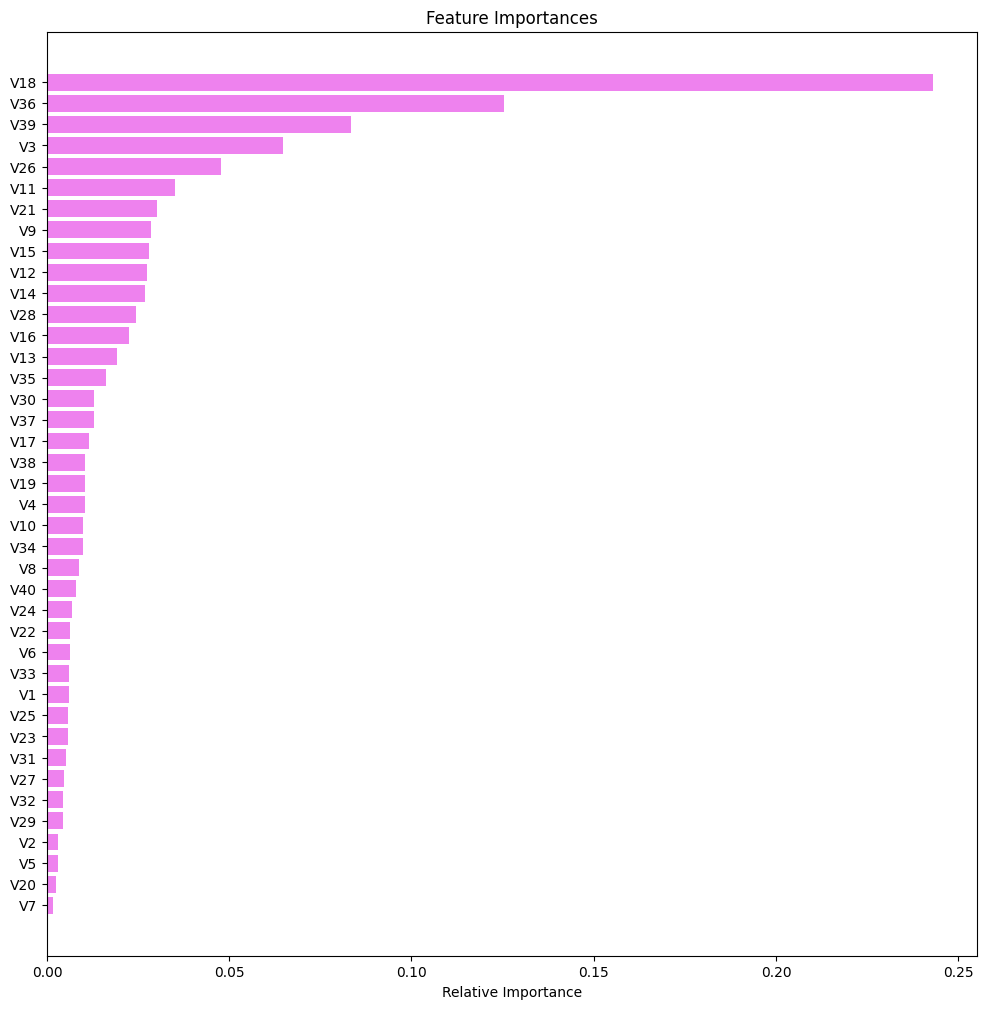

In [ ]:
feature_names = X.columns
importances = gb_tuned_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The top 5 most important features are V18, V36, V3, V39 and V14.

## Pipelines to build the final model


In [ ]:
pipe = Pipeline([('imputer', SimpleImputer(strategy="median")), ("Gradient Boosting",GradientBoostingClassifier(random_state = 1 ,subsample = 0.7, n_estimators = 175, max_features = 0.5, learning_rate = 0.1),)
                ]
               )

pipe.fit(X_train_un, y_train_un)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Gradient Boosting',
                 GradientBoostingClassifier(max_features=0.5, n_estimators=175,
                                            random_state=1, subsample=0.7))])

In [ ]:
# Calculating different metrics on test set
Val_Score = model_performance_classification_sklearn(pipe, X_val, y_val)
print("Final Model performance on Validation Dataset:")
Val_Score

Final Model performance on Validation Dataset:


,Accuracy,Recall,Precision,F1
0,0.928333,0.885886,0.429403,0.578431


In [ ]:
# Calculating different metrics on test set
Test_Score = model_performance_classification_sklearn(pipe, X_test, y_test)
print("Final Model performance on Test Dataset:")
Test_Score

Final Model performance on Test Dataset:


,Accuracy,Recall,Precision,F1
0,0.9288,0.875887,0.434859,0.581176


##EDA

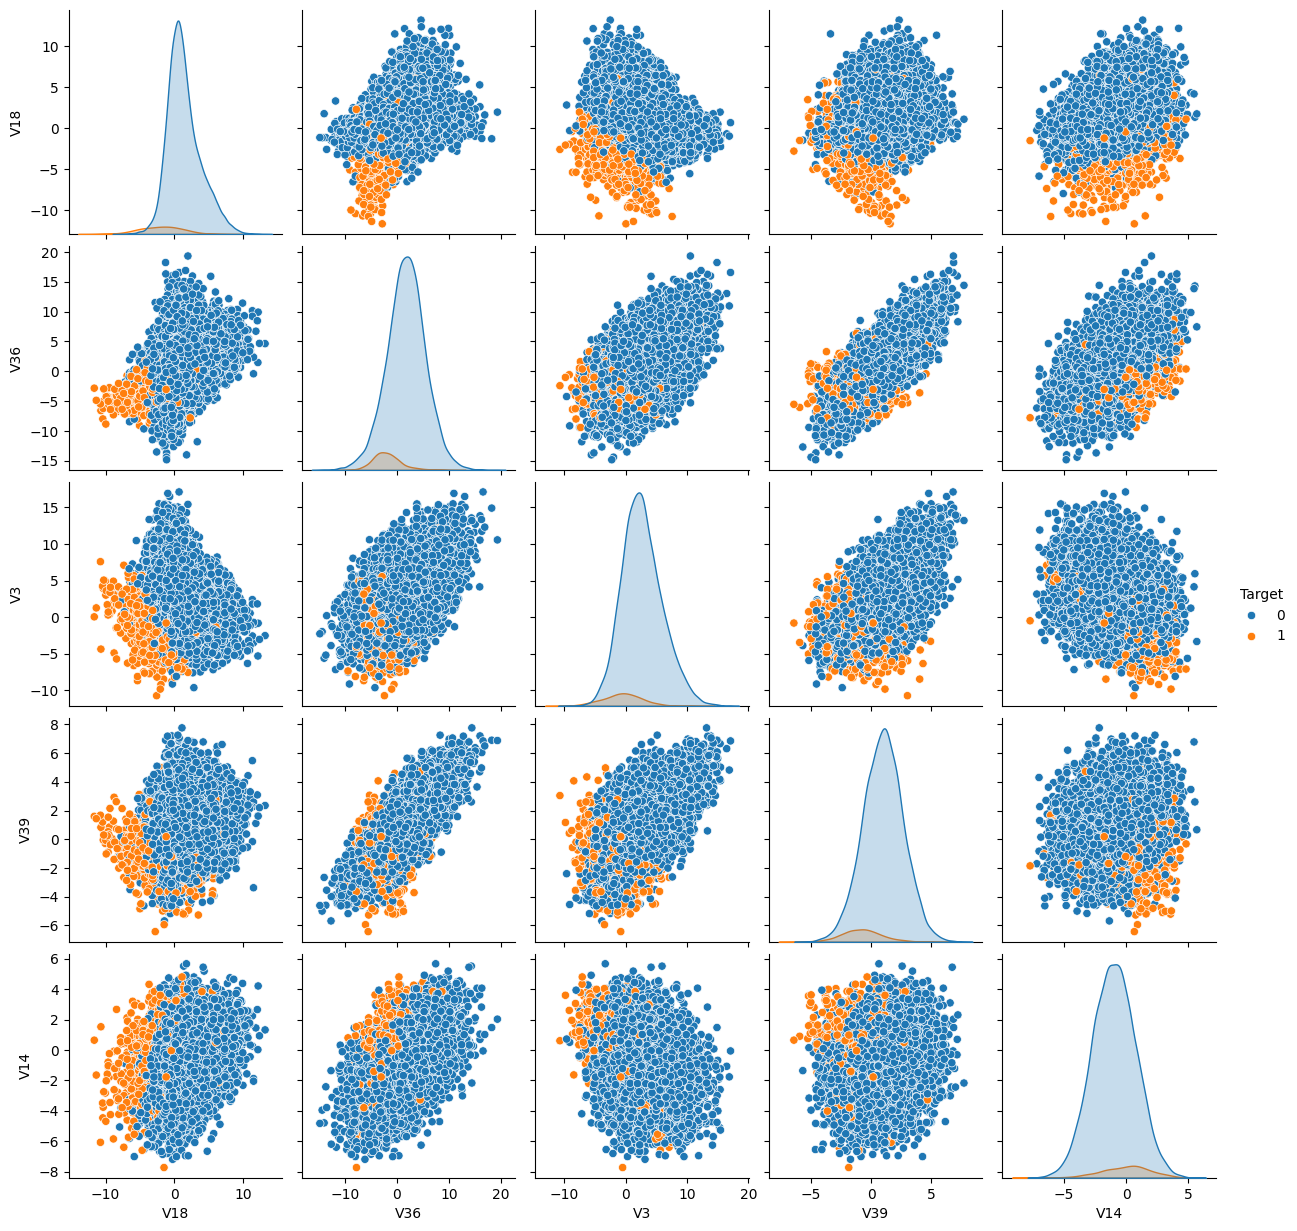

In [ ]:
sns.pairplot(data = df, vars = ['V18','V36','V3','V39','V14'] , hue='Target' , diag_kind = 'kde')
plt.show()

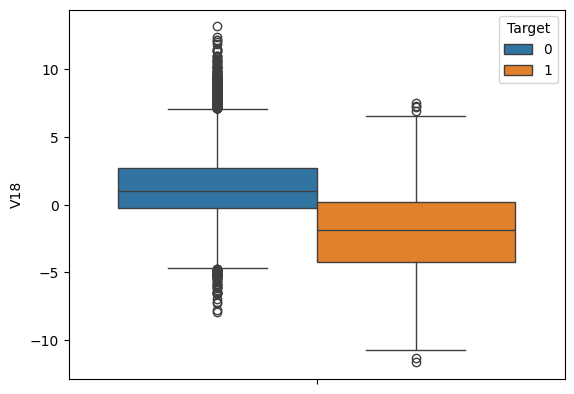

In [ ]:
sns.boxplot(data = df, y = 'V18', hue = 'Target');

The median of the Failure machine is less than the Non failure machines and the range is negative for Failure machines.

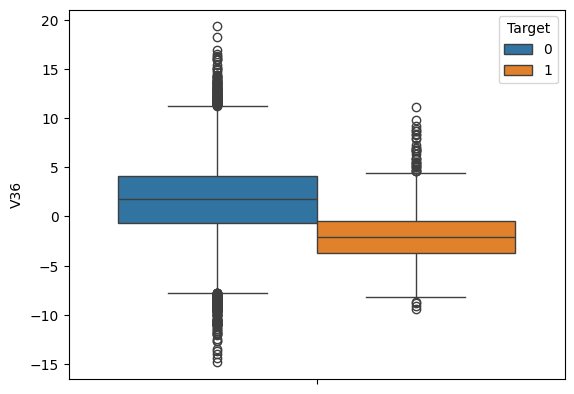

In [ ]:
sns.boxplot(data = df, y = 'V36', hue = 'Target');

The median of the Failure machine is less than the Non failure machines and the range is negative for Failure machines.

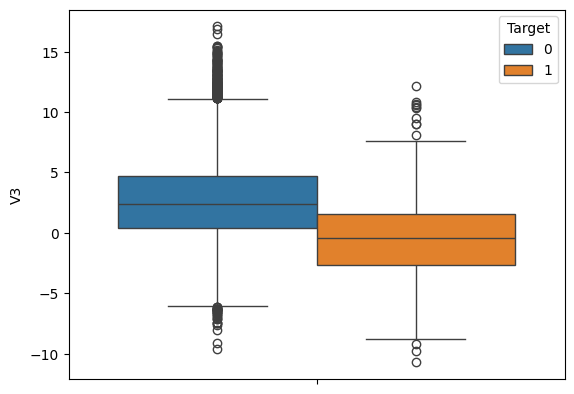

In [ ]:
sns.boxplot(data = df, y = 'V3', hue = 'Target');

The median of the Failure machine is less than the Non failure machines.

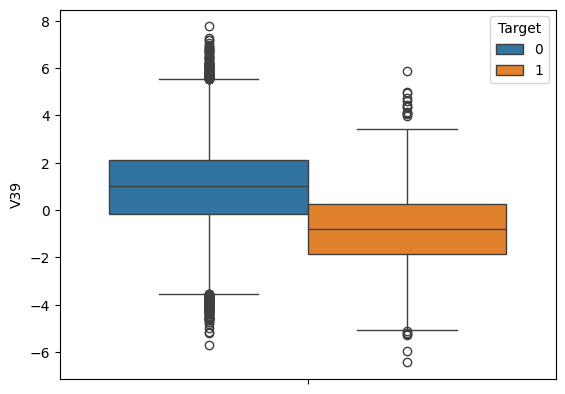

In [ ]:
sns.boxplot(data = df, y = 'V39', hue = 'Target');

The median of the Failure machine is less than the Non failure machines and the range is negative for Failure machines.

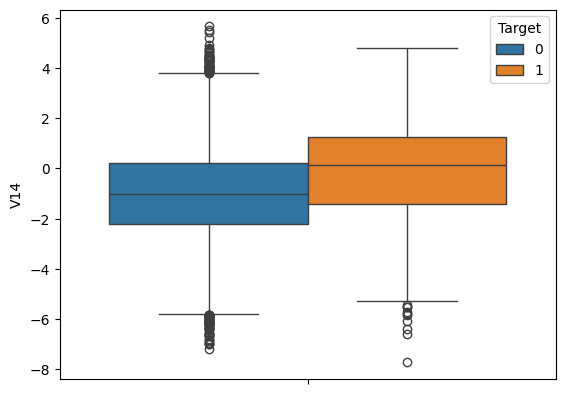

In [ ]:
sns.boxplot(data = df, y = 'V14', hue = 'Target');

The median of the Failure machine is more than the Non failure machines.

# Business Insights and Conclusions

*   Since we are looking at the recall score, Gradient Boosting model tuned with under sample data gives good results. This model gives a recall score of about 88% which is good.
*   Some of the important features of the model are V18, V36,  V3, V39 and V14.
    *   V18 should have positive range between 0 to 3.
    *   V36 should have range between 0 to 5.
    *   V3, V39 and V14 have overlapping ranges for failure and non failure machines.
    *   V3 and V39 have positive range for non failure machines.
    *   V14 have negative range for non failure machines.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/MT_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/MT_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 3740253 bytes to /content/drive/My Drive/Colab Notebooks/MT_Project_LearnerNotebook_FullCode.html


***